# G16 data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read in data from specified .csv file
df = pd.read_csv('New camera image data - Sheet1.csv')
data = df.values

## Comment in/out next line to see formatting of data ###
# print(df.loc[0][:])

In [2]:
### Constants ###
N = 16   # number of images in Powershot G16 Data
H_V_lattice = 3.493569812  #Reciprocal distance between Horizontal and Vertical Cu100 lattice points
D_lattice = 2.470326905    #Reciprocal distance between Diagonal Cu100 lattice points

In [35]:
### Data Values ###
electron_energy = data[:,1]
sqrt_E = np.sqrt(electron_energy)   #Used as x-values for line fit

opening_AU = data[:,2]     #Measured screen diameter in Arbitrary Units
opening_AU_m = np.mean(opening_AU)     #Average of screen diameter in AU
error_opening_AU = np.std(opening_AU)/opening_AU    #Fractional error in opening

#Separate data into separate sections
H_data = data[:,6:13]
# print(H_data[0,:])
V_data = data[:,17:24]
# print(V_data[:,3])
D_data = data[:,28:]
# print(D_data[0,:])

##need to fix first couple data points of diagonal data (divide spacing by 2 for first 4 measurements)
##due to a difference in measuring

In [4]:
### Fix first four data points
D_data[:5,0] = .5*D_data[:5,0]
D_data[:5,4] = .5*D_data[:5,4]
# print(D_data[:6,5]-D_data[:6,1])

In [5]:
### Calculated Values ###
#Screen opening and opening error
def recip_openingANDerror(lattice, data, Opening_A, Error_opening_AU):
    spacing_AU = data[:,4] - data[:,0]         #Calculate distance between points (Right_x_position - Left_x_position)
    opening = lattice*(Opening_A/spacing_AU)   #Calculate opening size in reciprocal space (lattice spacing*(Opening[AU]/Lattice spacing[AU]))
    d_left = .5*(data[:,2] - data[:,1])        #absolute error in left point .5*(width of peak at half max)
    d_right = .5*(data[:,6] - data[:,5])       #absolute error in right point .5*(width of peak at half max)
    d_spacing = np.sqrt(np.square(d_left) + np.square(d_right))   #absolute error in spacing (addition of absolute error in quadrature)
    frac_error = np.sqrt(np.square(d_spacing/spacing_AU) + np.square(Error_opening_AU/Opening_A))   #fractional error in spacing
    error_recip = frac_error*opening           #fractional error in opening calculation
    return opening, error_recip

#least squares fit with error in slope and intercept
##details of calculation in next cell
def w_lst_sq(opening_recip, error_recip, e_energy, sqrt_e):
    weights = 1/np.square(error_recip)         #weights for line fit from error in opening
    Delta = np.sum(weights)*np.sum(weights*e_energy)-np.square(np.sum(weights*sqrt_e))
    intercept = ((np.sum(weights*e_energy)*np.sum(weights*opening_recip))
                 -(np.sum(weights*sqrt_e)*np.sum(weights*sqrt_e*opening_recip)))/Delta
    slope = (np.sum(weights)*np.sum(weights*sqrt_e*opening_recip)-np.sum(weights*sqrt_e)*np.sum(weights*opening_recip))/Delta
    intercept_error = np.sqrt(np.sum(weights*e_energy)/Delta)
    slope_error = np.sqrt(np.sum(weights)/Delta)
    return slope, slope_error, intercept, intercept_error

$$ B = \frac{\sum{w  E} \sum{w  o} - \sum w\sqrt{E} \sum w o \sqrt{E} }{\Delta} $$

$$ A = \frac{\sum{w} \sum{w o \sqrt{E}}-\sum{w\sqrt e} \sum{w o}}{\Delta} $$

Where 
$$ \Delta = \sum{w} \sum{w E}- (\sum w\sqrt{e})^2 $$
And 
$$ Y = Ax + B $$

In [6]:
H_recip_opening, H_opening_error = recip_openingANDerror(H_V_lattice, H_data, opening_AU, error_opening_AU)
H1_slope, H1_slope_error, H1_intercept, H1_intercept_error = w_lst_sq(H_recip_opening, H_opening_error, electron_energy, sqrt_E)
print('H Slope + error', H1_slope, H1_slope_error, 'Intercept + error:', H1_intercept, H1_intercept_error)

V_recip_opening, V_opening_error = recip_openingANDerror(H_V_lattice, V_data, opening_AU, error_opening_AU)
V1_slope, V1_slope_error, V1_intercept, V1_intercept_error = w_lst_sq(V_recip_opening, V_opening_error, electron_energy, sqrt_E)
print('V Slope + error', V1_slope, V1_slope_error, 'Intercept + error:', V1_intercept, V1_intercept_error)

D_recip_opening, D_opening_error = recip_openingANDerror(D_lattice, D_data, opening_AU, error_opening_AU)
D1_slope, D1_slope_error, D1_intercept, D1_intercept_error = w_lst_sq(D_recip_opening, D_opening_error, electron_energy, sqrt_E)
print('D Slope + error', D1_slope, D1_slope_error, 'Intercept + error:', D1_intercept, D1_intercept_error)

H Slope + error 0.7702071387066763 0.03752820129150288 Intercept + error: 0.5130240351966252 0.3349668602467557
V Slope + error 0.7650675038207839 0.04814540132896146 Intercept + error: 0.6314761751409919 0.43293008006211614
D Slope + error 0.7776123059603269 0.05714997235386788 Intercept + error: 0.498209224988452 0.5071268144172828


# Old camera data

In [7]:
#Read in data from old camera, same format as above
df2 = pd.read_csv('Old Camera image data - Sheet1.csv')
data2 = df2.values


In [63]:
### Data Values ###
#all values same format as above
N2 = 9
electron_energy2 = data2[:,1]
sqrt_E2 = np.sqrt(electron_energy2)

opening_AU2 = data2[:,2]
opening_AU_m2 = np.mean(opening_AU2)
error_opening_AU2 = np.std(opening_AU2)/opening_AU2


H_data2 = data2[:,6:13]
# print(H_data[0,:])
V_data2 = data2[:,17:24]
# print(V_data[:,3])
D_data2 = data2[:,28:]
# print(D_data[0,:])

In [66]:
print(df2.loc[4][27:], data2[:,28])

D_Height_1            46.0320
D_Xpeak_1              0.0505
D_Half max left_1      0.0454
D_Half max right_1     0.0608
D_Height_2            33.9100
D_Xpeak_2              0.6620
D_Half max left_2      0.6520
D_Half max right_2     0.6720
Name: 4, dtype: float64 [0.006325  0.0079625 0.0059875 0.00365   0.0063125 0.0262    0.0152
 0.034     0.0393   ]


In [44]:
### Fix first four data points
# D_data2[:6,0] = .5*D_data2[:6,0]
# D_data2[:6,4] = .5*D_data2[:6,4]
# print(D_data[:6,5]-D_data[:6,1])

#### Line fit based on old camera data (ignore)

In [45]:
# H_recip_opening2, H_opening_error2 = recip_openingANDerror(H_V_lattice, H_data2, opening_AU2, error_opening_AU2)
# H2_slope, H2_slope_error, H2_intercept, H2_intercept_error = w_lst_sq(H_recip_opening2, H_opening_error2, electron_energy2, sqrt_E2)
# print('H2 Slope + error', H2_slope, H2_slope_error, 'Intercept + error:', H2_intercept, H2_intercept_error)

# V_recip_opening2, V_opening_error2 = recip_openingANDerror(H_V_lattice, V_data2, opening_AU2, error_opening_AU2)
# V2_slope, V2_slope_error, V2_intercept, V2_intercept_error = w_lst_sq(V_recip_opening2, V_opening_error2, electron_energy2, sqrt_E2)
# print('V2 Slope + error', V2_slope, V2_slope_error, 'Intercept + error:', V2_intercept, V2_intercept_error)

# #Diagonal seems to be not working, need to diagnose
# D_recip_opening2, D_opening_error2 = recip_openingANDerror(D_lattice, D_data2, opening_AU2, error_opening_AU2)
# D2_slope, D2_slope_error, D2_intercept, D2_intercept_error = w_lst_sq(D_recip_opening2, D_opening_error2, electron_energy2, sqrt_E2)
# # print('D2 Slope + error', D2_slope, D2_slope_error, 'Intercept + error:', D2_intercept, D2_intercept_error)


## Error calculations

In [46]:
#Calculate spacing between measured points in Arbitrary Units and fractional error
def spacing_AU(data):  
    meas_spacing = data[:,4] - data[:,0]
    spacing_frac_error = np.sqrt(np.square(.5*(data[:,2] - data[:,1])) + np.square(.5*(data[:,6] - data[:,5])))/meas_spacing
    return meas_spacing, spacing_frac_error

#Fractional error in line fit parameters A and B
def frac_axb(A, d_A, B, d_B, sqrt_e):
    frac = np.sqrt(np.square(sqrt_e*d_A) + np.square(d_B))/(A*sqrt_e + B)
    return frac

#Calculate fractional error in opening calculation from line fit
def frac_error(frac_ab, frac_open, frac_space): 
    tot_frac_error = np.sqrt(np.square(frac_ab) + np.square(frac_open) + np.square(frac_space))
    return tot_frac_error

## Spacing calculations

In [47]:
#Calculate reciprocal spacing between measured points using fit line
def spacing_calc(energy, meas_opening, data):
    meas_spacing = data[:,4] - data[:,0]
    ratio = meas_spacing/meas_opening
    direction = str(input('Which direction? H/V/D (case sensitive)'))
    if direction == 'H':
        opening_func = 0.7707384404775303*np.sqrt(energy) + 0.507881158392666
    elif direction == 'V':
        opening_func = 0.7635937144289188*np.sqrt(energy) + 0.6470749251271875
    else:
        opening_func = 0.7781788677967666*np.sqrt(energy) + 0.4939931209205846
    
    spacing = ratio*opening_func
    return spacing

In [48]:
H_spacing = spacing_calc(electron_energy, opening_AU, H_data)
H2_spacing = spacing_calc(electron_energy2, opening_AU2, H_data2)

Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H


In [49]:
V_spacing = spacing_calc(electron_energy, opening_AU, V_data)
V2_spacing = spacing_calc(electron_energy2, opening_AU2, V_data2)

Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H


In [50]:
D_spacing = spacing_calc(electron_energy, opening_AU, D_data)
D2_spacing = spacing_calc(electron_energy2, opening_AU2, D_data2)

Which direction? H/V/D (case sensitive)H
Which direction? H/V/D (case sensitive)H


In [51]:
H_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E)
H_spacing_meas, H_frac_spacing = spacing_AU(H_data)
H_frac_error = frac_error(H_frac_axb, error_opening_AU, H_frac_spacing)
H_error = H_frac_error*H_spacing

V_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E)
V_spacing_meas, V_frac_spacing = spacing_AU(V_data)
V_frac_error = frac_error(V_frac_axb, error_opening_AU, V_frac_spacing)
V_error = V_frac_error*V_spacing

D_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E)
D_spacing_meas, D_frac_spacing = spacing_AU(D_data)
D_frac_error = frac_error(D_frac_axb, error_opening_AU, D_frac_spacing)
D_error = D_frac_error*D_spacing

In [52]:
H2_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E2)
H2_spacing_meas, H2_frac_spacing = spacing_AU(H_data2)
H2_frac_error = frac_error(H2_frac_axb, error_opening_AU2, H2_frac_spacing)
H2_error = H2_frac_error*H2_spacing

V2_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E2)
V2_spacing_meas, V2_frac_spacing = spacing_AU(V_data2)
V2_frac_error = frac_error(V2_frac_axb, error_opening_AU2, V2_frac_spacing)
V2_error = V2_frac_error*V2_spacing

D2_frac_axb = frac_axb(H1_slope, H1_slope_error, H1_intercept, H1_intercept_error, sqrt_E2)
D2_spacing_meas, D2_frac_spacing = spacing_AU(D_data2)
D2_frac_error = frac_error(D2_frac_axb, error_opening_AU2, D2_frac_spacing)
D2_error = D2_frac_error*D2_spacing

In [53]:
print(D_error)

[0.19425988 0.18650772 0.19430432 0.19892555 0.20013313 0.18588637
 0.18318712 0.18232856 0.16790689 0.17636242 0.18046295 0.18235409
 0.18187754 0.17361929 0.1849025  0.1931611 ]


In [54]:
# Averages of each error
print('Mean % error in V:', np.mean(V_frac_error),
      '\nMean % error in H2:',  np.mean(H2_frac_error),
      '\nMean % error in V2:',  np.mean(V2_frac_error))

Mean % error in V: 0.07207415773951117 
Mean % error in H2: 0.07790374111190831 
Mean % error in V2: 0.07971842492559178


# Plot theoretical spacing vs energy
### for old camera data using new camera line fit

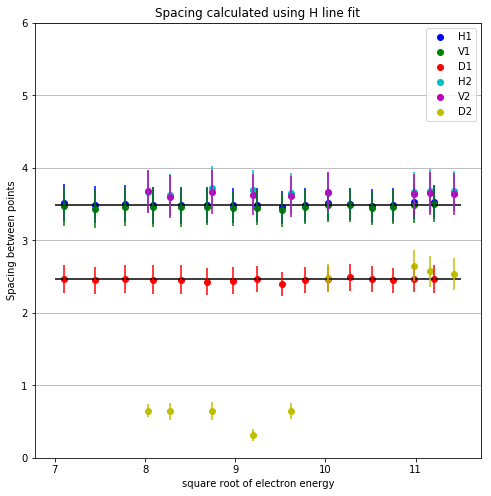

In [55]:
## scatter plot sqrt energy vs calculated spacing with constant line at theoretical spacing
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

x1 = sqrt_E
x2 = sqrt_E2

ax1.hlines(H_V_lattice, 7, 11.5)
ax1.hlines(D_lattice, 7, 11.5)

ax1.scatter(x1, H_spacing, label='H1', color='b')
ax1.errorbar(x1, H_spacing, yerr=H_error, ls='none', color='b')

ax1.scatter(x1, V_spacing, label='V1', color='g')
ax1.errorbar(x1, V_spacing, yerr=V_error, ls='none', color='g')

ax1.scatter(x1, D_spacing, label='D1', color='r')
ax1.errorbar(x1, D_spacing, yerr=D_error, ls='none', color='r')


ax1.scatter(x2, H2_spacing, label='H2', color='c')
ax1.errorbar(x2, H2_spacing, yerr=H2_error, ls='none', color='c')

ax1.scatter(x2, V2_spacing, label='V2', color='m')
ax1.errorbar(x2, V2_spacing, yerr=V2_error, ls='none', color='m')

ax1.scatter(x2, D2_spacing, label='D2', color='y')
ax1.errorbar(x2, D2_spacing, yerr=D2_error, ls='none', color='y')


plt.ylim(0,6)
plt.title('Spacing calculated using H line fit')
plt.xlabel('square root of electron energy')
plt.ylabel('Spacing between points')
plt.grid(b=True, axis='y')
plt.legend()

In [56]:
print(D2_spacing_meas[3:5], D_data2[2:5,4]- D_data2[2:5,0])

[0.038475  0.0764375] [0.0831375 0.038475  0.0764375]


In [57]:
print(df2.loc[4][28:])

D_Xpeak_1              0.0505
D_Half max left_1      0.0454
D_Half max right_1     0.0608
D_Height_2            33.9100
D_Xpeak_2              0.6620
D_Half max left_2      0.6520
D_Half max right_2     0.6720
Name: 4, dtype: float64
